# Group 1
# Are different App Stores that different?
**Group Members**:
- Bozzelli Giammarco - 884962
- Cavaliere Marco - 887075
- Lupi Isaac - 885004
- Parigi Michele - 884948
- Sibilia Beatrice - 885016

## Link to the Google Drive folder containing the datasets

__[Group 1 Appstore_project](https://drive.google.com/drive/folders/1WpJfuIUlIh2z5hbM_b9GL8sOLfwKgE_n?usp=sharing)__

## Data Loading and Cleaning
**<i>(Beatrice Sibilia, Giammarco Bozzelli</i> and <i> Marco Cavaliere)**</i>

Before starting, we import all the modules we will need throughout the project

In [6]:
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import appstore as app #import as app the module we created to store functions in

We decided to <b> load </b> and <b> clean </b> one dataset at the time starting from the file <i> 'playstore.csv' </i>
### Play Store

First fo all we need to make sure that the file path is always correct no matter the operating system, to do this we decided to use the 'os.getcwd()' function, and also we print the list of the files in the folder path

In [7]:
data_folder = os.getcwd() #get the current working directory that we will use as path
file_dir_names = os.listdir(data_folder) #list of all files in the directory
print(data_folder,'\n', file_dir_names)

C:\Users\giamm\Desktop\University\Coding\Coding 2\Appstore_coding 
 ['.idea', 'AppleStore.csv', 'appstore.py', 'Appstore_project.ipynb', 'msft.csv', 'playstore.csv', 'steam_store.csv', '__pycache__']


Then we import the dataset from <i> 'playstore.csv' </i> directly as
a DataFrame using the Pandas' function <i> '.read_csv' </i>

In [8]:
playstore = pd.read_csv(os.path.join(data_folder,'playstore.csv'))# open playstore.csv as a Pandas DataFrame
playstore

,id,app_name,genre,rating,reviews,cost_label,rate_5_pc,rate_4_pc,rate_3_pc,rate_2_pc,rate_1_pc,updated,size,installs,current_version,requires_android,content_rating,in_app_products,offered_by
0,2,Sonic the Hedgehog™ Classic,NaN,4.1,"193,898 total",Install,68.0272,10.20410,5.442180,3.401360,12.92520,"March 24, 2020",61M,"10,000,000+",3.5.1,4.4 and up,Rated for 3+,"₫45,000 per item",SEGA
1,3,Push'em all,Action,3.8,"119,679 total",Install,56.1798,12.92130,8.426970,5.056180,17.41570,"April 16, 2020",41M,"10,000,000+",1.14,4.4 and up,Rated for 3+,"₫92,000 per item",VOODOO
2,5,Sky Fighters 3D,Action,4.2,"196,685 total",Install,67.1141,11.40940,7.382550,3.355700,10.73830,"May 14, 2019",19M,"10,000,000+",1.5,4.0 and up,Rated for 7+,"₫42,000 - ₫2,100,000 per item",Doodle Mobile Ltd.
3,6,Robbery Bob,Action,4.3,"984,779 total",Install,74.0741,8.14815,5.185180,2.962960,9.62963,"March 25, 2020",42M,"50,000,000+",1.18.23,4.1 and up,Rated for 7+,"₫18,000 - ₫192,000 per item",Level Eight AB
4,7,Shadow Fight 2,Action,4.6,"12,861,970 total",Install,85.4701,5.98291,2.564100,0.854701,5.12821,"April 15, 2020",142M,"100,000,000+",2.5.1,4.1 and up,Rated for 12+,"₫6,000 - ₫1,149,999 per item",NEKKI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53727,53653,Omni Websites: Free Website Builder & Online S...,Productivity,3.4,365 total,Install,47.6190,10.95240,6.666670,6.666670,28.09520,"April 13, 2020",4.0M,"50,000+",17,5.0 and up,Rated for 3+,NaN,Just Dial Ltd.
53728,53680,Web Alert Expansion Pack,Productivity,4.4,480 total,"₫44,500 Buy",71.9424,15.82730,3.597120,0.719424,7.91367,"November 19, 2019",1.1M,"5,000+",0.85,2.3 and up,Rated for 3+,NaN,Web Alert
53729,53683,Reading Comprehension – GRE® Test Prep & Practice,Education,4.4,607 total,Install,63.2911,27.84810,4.430380,2.531650,1.89873,"May 14, 2017",3.1M,"50,000+",2.0.4,4.1 and up,Rated for 3+,"₫22,000 per item",Timbre Inc.
53730,53707,Soulspace Christian Meditation,Health & Fitness,4.8,273 total,Install,84.7458,13.55930,1.694920,0.000000,0.00000,"April 24, 2020",29M,"10,000+",1.34,5.0 and up,Rated for 3+,"₫94,000 - ₫234,000 per item",Chois & Co.


Now we keep only the columns we will need to use and rename them

In [9]:
playstore = playstore.loc[:,["app_name","genre","rating","reviews","cost_label","size","installs"]] #get only the columns we need
playstore.columns = ["name","category","rating","reviews","price","size (MB)","installs"] #renaming all columns

Time to start cleaning the <b>playstore</b> DataFrame!

First thing first we remove from the **_'price'_** column all unnecessary characters by replacing them with an empty string. We noted that in the
dataframe free applications were marked with the label _'Install'_ so we replaced it with _zero (0)_ , also some
apps had an historical report of price changes ( _Was X now is Y_ ) so what we did was change this string into a list
(_split(' ')_) to then select the last item _str[-1]_. Lastly we convert the column from _str_ to _numpy.float32_ type and
convert the price from Vietnamese Dong to USD

In [10]:
bad = [",","₫"," Buy"] #list of all things to remove
for s in bad:
    playstore["price"] = playstore["price"].str.replace(s,"")

playstore['price'] = playstore['price'].str.replace('Install', '0')
playstore['price'] = playstore['price'].str.split(' ').str[-1] #was 200 now is 7
playstore['price'] = np.float32(playstore['price'])*0.000043

We go on cleaning the **_'size'_** column by removing unwanted characters, replacing NaN values with 0
(that we will later on remove) and converting the column into _numpy.float32_

In [11]:
bad = ['M',',','k']
for s in bad:
    playstore["size (MB)"] = playstore["size (MB)"].str.replace(s,"")

playstore['size (MB)'] = playstore['size (MB)'].str.replace('Varies with device','0')
playstore['size (MB)']= playstore['size (MB)'].fillna(0)
playstore['size (MB)'] = np.float32(playstore['size (MB)'])

Now is time to clean the **_'installs'_** and the **_'reviews'_** columns

In [12]:
playstore['installs'] = playstore['installs'].str.strip('+')
playstore['installs'] = playstore['installs'].str.replace(',', '')
playstore['installs'] = np.float32(playstore['installs'])

In [13]:
playstore['reviews'] = playstore['reviews'].str.replace(' total', '')
playstore['reviews'] = playstore['reviews'].str.replace(',', '')
playstore['reviews']=np.float32(playstore['reviews'])

The last thing we need to do now is to add a column **_'store' _** that specifies to store, this well be useful when we will merge all datasets together

In [14]:
playstore["store"] = "playstore" #add a column to specify the store
playstore

,name,category,rating,reviews,price,size (MB),installs,store
0,Sonic the Hedgehog™ Classic,NaN,4.1,193898.0,0.0000,61.0,10000000.0,playstore
1,Push'em all,Action,3.8,119679.0,0.0000,41.0,10000000.0,playstore
2,Sky Fighters 3D,Action,4.2,196685.0,0.0000,19.0,10000000.0,playstore
3,Robbery Bob,Action,4.3,984779.0,0.0000,42.0,50000000.0,playstore
4,Shadow Fight 2,Action,4.6,12861970.0,0.0000,142.0,100000000.0,playstore
...,...,...,...,...,...,...,...,...
53727,Omni Websites: Free Website Builder & Online S...,Productivity,3.4,365.0,0.0000,4.0,50000.0,playstore
53728,Web Alert Expansion Pack,Productivity,4.4,480.0,1.9135,1.1,5000.0,playstore
53729,Reading Comprehension – GRE® Test Prep & Practice,Education,4.4,607.0,0.0000,3.1,50000.0,playstore
53730,Soulspace Christian Meditation,Health & Fitness,4.8,273.0,0.0000,29.0,10000.0,playstore


## Microsoft store

As we did before we import the dataset as a DataFrame using the Pandas' funciton '.read_csv'

In [15]:
microsoft_store = pd.read_csv(os.path.join(data_folder, 'msft.csv'))
microsoft_store

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


We then procede selecting only the columns we need and renaming them.
This time we need to create a cloumn called "size (MB)" and we choose "0.0" to be the content.

In [16]:
#clean columns
microsoft_store = microsoft_store.loc[:, ["Name", "Rating", "No of people Rated", "Category", "Price"]] #get only the columns we nee
microsoft_store.columns = ["name", "rating", "No of people Rated", "category", "price"]#renaming the columns
microsoft_store['size (MB)'] = 0.0 #add 0 because we do not want nan in this columns when we merge all datasets

We have to clean the column 'price'. First, we replace the string "Free" with the number 0. Than we remove the symbol of the currency, the comma and the symbol of the plus.
The last point is to commute the string into a float number and to multiply it for 0.013, in order to convert the values into US dollars.

In [17]:
microsoft_store['price'] = microsoft_store['price'].str.replace('Free', '0')
microsoft_store['price'] = microsoft_store['price'].str.replace('₹ ', '')

microsoft_store['price'] = microsoft_store['price'].astype(str)
microsoft_store['price'] = microsoft_store['price'].str.strip('+, ')#remove leading and trailing single characters

#convert the 'price' column to float64 and from Indian rupee to USD
microsoft_store['price'] = np.float64(microsoft_store['price'].str.replace(',', '')) * 0.013

We create a new column, "store", in which we specify the store to which the data belongs.

In [18]:
microsoft_store["store"] = "microsoft_store"

We convert the 'No of people Rated' column from string to a float number.

In [19]:
microsoft_store['No of people Rated']=np.float64(microsoft_store['No of people Rated'])
microsoft_store


,name,rating,No of people Rated,category,price,size (MB),store
0,Dynamic Reader,3.5,268.0,Books,0.000,0.0,microsoft_store
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627.0,Books,0.000,0.0,microsoft_store
2,BookViewer,3.5,593.0,Books,0.000,0.0,microsoft_store
3,Brick Instructions,3.5,684.0,Books,0.000,0.0,microsoft_store
4,Introduction to Python Programming by GoLearni...,2.0,634.0,Books,0.000,0.0,microsoft_store
...,...,...,...,...,...,...,...
5317,JS King,1.0,720.0,Developer Tools,3.497,0.0,microsoft_store
5318,MQTTSniffer,2.5,500.0,Developer Tools,0.832,0.0,microsoft_store
5319,"Dev Utils - JSON, CSV and XML",4.0,862.0,Developer Tools,3.497,0.0,microsoft_store
5320,Simply Text,4.0,386.0,Developer Tools,2.847,0.0,microsoft_store


### Apple Store
Like we did for the previous ones, we import the dataset as a DataFrame using the Pandas' funciton '.read_csv'

In [20]:
appstore = pd.read_csv(os.path.join(data_folder,'AppleStore.csv'))
appstore

,Unnamed: 0,id,name,size_bytes,currency,price,installs,rating_count_ver,rating,user_rating_ver,ver,cont_rating,category,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


We changed the names of the columns with the same procedure we adopted before

In [21]:
appstore = appstore.loc[:,["name","size_bytes","price","installs","rating","category", "rating_count_ver"]]
appstore.columns = ["name","size (MB)","price","installs","rating","category","No of people Rated"]
appstore['size (MB)'] = np.float64(appstore['size (MB)'])/1000000 #convert from bytes to megabytes

And we created a specific column with the purpose of identifying the store, <b>appstore</b> in this case

In [22]:
appstore["store"] = "appstore"
appstore['No of people Rated']= np.float64(appstore['No of people Rated'])

Now it's time to merge all Dataframes together and create a new dataframe that we will use to answer our research
questions

In [23]:
#Merge Dataframes
alldata = pd.concat([playstore, appstore, microsoft_store])
alldata

,name,category,rating,reviews,price,size (MB),installs,store,No of people Rated
0,Sonic the Hedgehog™ Classic,NaN,4.1,193898.0,0.000,61.0,10000000.0,playstore,NaN
1,Push'em all,Action,3.8,119679.0,0.000,41.0,10000000.0,playstore,NaN
2,Sky Fighters 3D,Action,4.2,196685.0,0.000,19.0,10000000.0,playstore,NaN
3,Robbery Bob,Action,4.3,984779.0,0.000,42.0,50000000.0,playstore,NaN
4,Shadow Fight 2,Action,4.6,12861970.0,0.000,142.0,100000000.0,playstore,NaN
...,...,...,...,...,...,...,...,...,...
5317,JS King,Developer Tools,1.0,NaN,3.497,0.0,NaN,microsoft_store,720.0
5318,MQTTSniffer,Developer Tools,2.5,NaN,0.832,0.0,NaN,microsoft_store,500.0
5319,"Dev Utils - JSON, CSV and XML",Developer Tools,4.0,NaN,3.497,0.0,NaN,microsoft_store,862.0
5320,Simply Text,Developer Tools,4.0,NaN,2.847,0.0,NaN,microsoft_store,386.0


Since not all stores had a **_'reviews'_** column we decided to create a new column named **_interactions_**
that basically uses the **_reviews_** column in datasets that have it and the **_No of people Rated_** in
datasets without it. This new column, together with the **_rating_** column, will be used as an **indicator** for the popularity
of each application.

In [24]:
#Clean columns
alldata['No of people Rated'] = alldata['No of people Rated'].fillna(0)
alldata['reviews'] = alldata['reviews'].fillna(0)

alldata['interactions'] = alldata['reviews'] + alldata['No of people Rated'] #merge 'reviews' and 'No of people rated' into 'interaction'

 Now we select only the column we will need and remove all rows that have 4 or more NaN values (that would be
 useless for our research)

In [25]:
alldata = alldata.loc[:,['name','price','interactions','category', 'store', 'rating', 'size (MB)']] #select only comuns we want

alldata = alldata.dropna(thresh=4) #remove rows with more than 4 NaN values

Now we create a dictionary with the categories we want as keys, and the subcategories we want to merge together as a
lists of strings. Then we replace each sub-category with the main one.

We did this to have common categories among all stores

In [26]:
dict_categories = {'Health & Fitness':['Beauty','Medical','Health and Fitness'],
                       'Photos & Videos':['Video Players & Editors','Art & Design','Photography', 'Multimedia Design', 'Photo & Video'],
                       'News':['Weather', 'News & Magazines', 'Sports','News and Weather', 'Weather'],
                       'Games':['Puzzle', 'Adventure', 'Action', 'Arcade', 'Trivia', 'Word', 'Music', 'Casual', 'Card', 'Simulation', 'Role Playing', 'Strategy', 'Casino', 'Comics', 'Board', 'Educational', 'Racing'],
                       'Music':['Music & Audio'],
                       'Business': ['Finance', 'Government and Politics'],
                       'Social' : ['Communication', 'Dating', 'Entertainment', 'Events', 'Social Networking'],
                       'Lifestyle' : ['Personalization', 'Shopping'],
                       'Tools & Utilities' : ['Productivity', 'Tools', 'Libraries & Demo','House & Home', 'Catalogs', 'Utilities','Developer Tools'],
                       'Food & Drink' : ['Food and Dining'],
                       'Maps & Navigation' : ['Auto & Vehicles', 'Travel', 'Travel & Local', 'Navigation and Maps', 'Navigation'],
                       'Books & Reference' : ['Books', 'Book', 'Reference'],
                       'Education' : ['Parenting', 'Kids and Family']}


for k,v in dict_categories.items():
    for x in v:
        alldata['category'].replace(x, k, inplace = True) #replace sub categories with the categories we want

Lastly we plot a **pie chart** using our _pie chart_ function starting from the merged dataframe

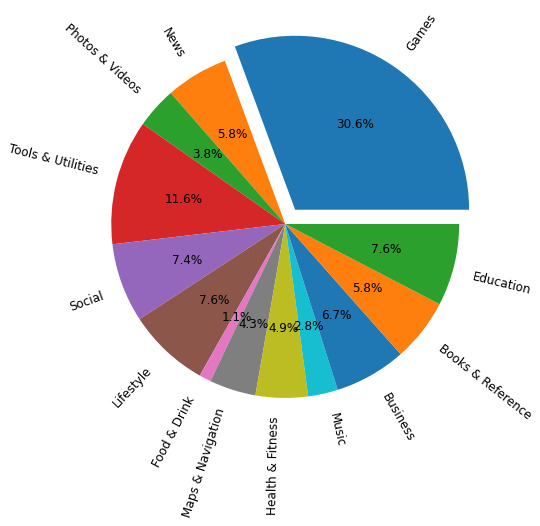

In [27]:
pie = app.pie_chart(alldata)

## Question N.1
### Which App Category do users prefer?
**<i>(Giammarco Bozzelli</i> and <i>Marco Cavaliere)**</i>

Since we want to find the category that users prefer we need to give applications a more _realistic_ rating,
this is becasue one app may have a **5 stars rating** but just **few interactions**, so we have to give a **_weight_**
to each rating. To do this we have built the **top_categories_weighted** function in the _appstore_ module that takes as
input a Dataframe and _optionally_ the store name that we want to study, and return a dictionary with categories as keys
and the _weighted ratings_ as values.

We also created another function called **_graphic rating_** to create and print the dictionary coming
from the **top_categories_weighted** function to visualize results

We first analyze each store differently, so we:
- Use the _top categories weighted_ function to get the dictionary
- Use the _praphic rating_ function to represent results

We start from  **Playstore**

The highest rated category is:  Health & Fitness


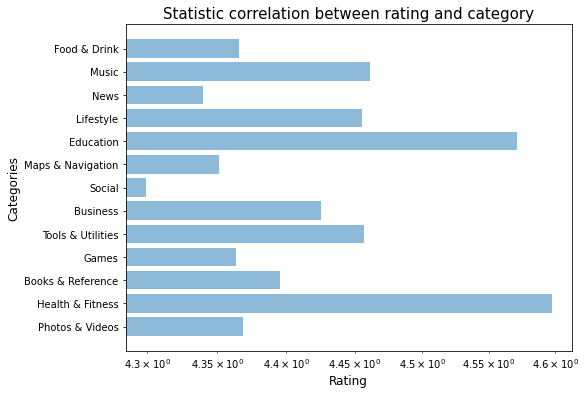

In [28]:

pscateg_dict=app.top_categories_weighted(alldata,'playstore')

app.grafic_rating(pscateg_dict)

As we can see by the graph above the **_Health & Fitness_** category is the highest rated in the _Playstore_.

We then move on analyzing the **_Applestore_**

The highest rated category is:  Lifestyle


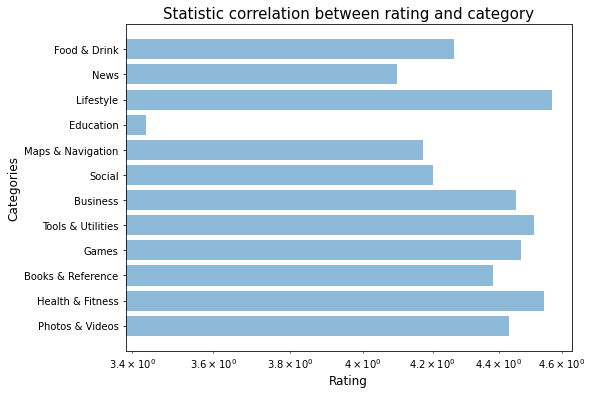

In [29]:

ascateg_dict=app.top_categories_weighted(alldata,'appstore')

app.grafic_rating(ascateg_dict)

And the **_Lifestyle_** category results as the preferred one in the _Appstore_.

Now it's **_Microsoftstore_**' turn:

The highest rated category is:  Education


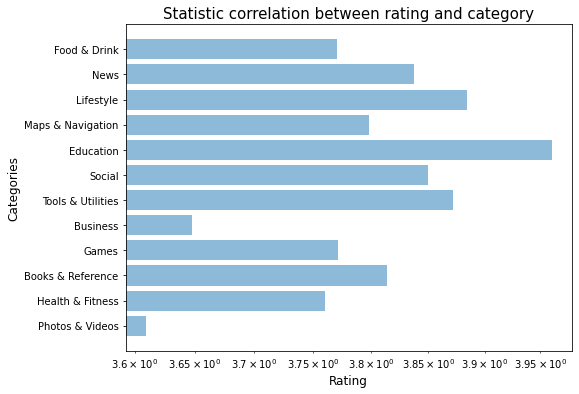

In [30]:
mccateg_dict=app.top_categories_weighted(alldata,'microsoft_store')

app.grafic_rating(mccateg_dict)

In the _Microsoftstore_ the most liked category is **_Education_**.

### What will happen if we use all appstores together?

The highest rated category is:  Health & Fitness


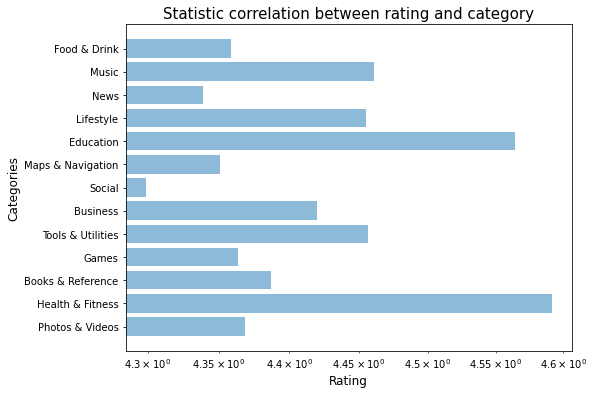

In [31]:
allcateg_dict= app.top_categories_weighted(alldata)

app.grafic_rating(allcateg_dict)

### Results
The prefered category is different for eache store:
- **Playstore** --> _Health & Fitness_
- **Appstore** --> _Lifestyle_
- **Microsoft** --> _Education_

But if we use the whole DataFrame we found that the highest rated category is: **Health & Fitness**

## Question N.2
### For which App Category are users willing to pay more?
<i>**(Isaac Lupi)**</i>
1. For each app with same category we compute the price mean<p>
1. Then we compute the mean of interactions per category <p>
1. Then we find a relation between the two and sort it in a new dataframe <p>
1. Finally we represent it graphically <p>


In [32]:
#Creating a copy to work safely
df = alldata.copy()

#Selecting the essential columns for our research question
df = df[['category', 'price','interactions','store']]
df

,category,price,interactions,store
0,NaN,0.0000,193898.0,playstore
1,Games,0.0000,119679.0,playstore
2,Games,0.0000,196685.0,playstore
3,Games,0.0000,984779.0,playstore
4,Games,0.0000,12861970.0,playstore
...,...,...,...,...
5316,Tools & Utilities,0.7085,785.0,microsoft_store
5317,Tools & Utilities,3.4970,720.0,microsoft_store
5318,Tools & Utilities,0.8320,500.0,microsoft_store
5319,Tools & Utilities,3.4970,862.0,microsoft_store


- It appears that there are some app with Nan values in the interested columns: price, categories
- They both will be removed, in order to procced with the research question

In [33]:
#Checking how many Nan values per columns
df.isnull().sum()

category        5021
price             22
interactions       0
store              0
dtype: int64

In [34]:
#dropping the Nan values of the price and category columns
df.dropna(subset=['price','category'], inplace=True)

In [35]:
#checking the results
df.isnull().sum()

category        0
price           0
interactions    0
store           0
dtype: int64

We can now work on the research question:<p>
- For each category a mean will be computed
- For each category the sum of interactions will be computed
- The mean and the interactions will be displayed and sorted in a new dataframe

In [36]:
#Finding all the categories and storing them in a list

categories = (df['category'].tolist())  # getting all category types
category_list = [] # dict to contain all the categories
for category in categories:  # filling the dictionary
   if category not in category_list:
       category_list.append(category)
   else:
       continue
category_list

['Games',
 'News',
 'Photos & Videos',
 'Tools & Utilities',
 'Social',
 'Lifestyle',
 'Food & Drink',
 'Maps & Navigation',
 'Health & Fitness',
 'Music',
 'Business',
 'Books & Reference',
 'Education']

Note: we are computing the mean of interactions since it is a liable indicator of how many people downloaded the app.

In [37]:
#Use the previous list to create a dictionary with the price mean of each category
price_mean_dict= {}  #creating an empty list to store the key=category and values=means
interaction_list= [] #creating an empty list just to store the sum of interactions for each category
for x in category_list:
    a = df[df['category']==x] #acceding the right rows for each category
    price_mean_dict[x]=a['price'].mean() #computing the mean over the columns for the series a['price'] of that specific category
    interaction_list.append(a['interactions'].mean()) #computing the mean over the columns for the series a['interactions'] of that specific category
print(price_mean_dict)
print(interaction_list)

{'Games': 0.5517017577875055, 'News': 0.3431533944687441, 'Photos & Videos': 0.578638461765088, 'Tools & Utilities': 0.7644955460784134, 'Social': 0.31479964262514765, 'Lifestyle': 0.3905748558402804, 'Food & Drink': 0.2172463132568517, 'Maps & Navigation': 0.5667718888691752, 'Health & Fitness': 0.6783613453866175, 'Music': 0.341869751606488, 'Business': 0.44826899124715747, 'Books & Reference': 0.4848727342119931, 'Education': 0.7988228636394746}
[74203.2142742668, 50206.64617987031, 123658.95813754806, 36174.10014084507, 160281.29346376169, 30668.31758642903, 11553.48377581121, 23362.93943981832, 13957.756483664534, 60078.20754716981, 13717.302405498282, 7610.323801513877, 7461.792667238422]


In [38]:
#Visualising the dictionary in a dataframe and the list in a series

df_mean_price = pd.Series(price_mean_dict).rename_axis('category').reset_index(name='mean price ($)')
print(df_mean_price)
df_interaction = pd.Series(interaction_list).rename_axis('mean of interactions')
print(df_interaction)

             category  mean price ($)
0               Games        0.551702
1                News        0.343153
2     Photos & Videos        0.578638
3   Tools & Utilities        0.764496
4              Social        0.314800
5           Lifestyle        0.390575
6        Food & Drink        0.217246
7   Maps & Navigation        0.566772
8    Health & Fitness        0.678361
9               Music        0.341870
10           Business        0.448269
11  Books & Reference        0.484873
12          Education        0.798823
mean of interactions
0      74203.214274
1      50206.646180
2     123658.958138
3      36174.100141
4     160281.293464
5      30668.317586
6      11553.483776
7      23362.939440
8      13957.756484
9      60078.207547
10     13717.302405
11      7610.323802
12      7461.792667
dtype: float64


In [39]:
#Merging the series with the dataframe
frames = [df_mean_price,df_interaction]
merged_frame = pd.concat(frames, axis=1)
merged_frame.rename(columns = {0:'mean of interactions'}, inplace = True) #renaming the column
merged_frame['mean of interactions'] = merged_frame['mean of interactions'].astype(int) #changint the type of the column, in order to make it more comprehensible
merged_frame

,category,mean price ($),mean of interactions
0,Games,0.551702,74203
1,News,0.343153,50206
2,Photos & Videos,0.578638,123658
3,Tools & Utilities,0.764496,36174
4,Social,0.314800,160281
5,Lifestyle,0.390575,30668
6,Food & Drink,0.217246,11553
7,Maps & Navigation,0.566772,23362
8,Health & Fitness,0.678361,13957
9,Music,0.341870,60078


- Now we have to understand what's the mean revenue for each app of the category in order to answer our research question <p>
- to compute it we just need to multuply the last two columns

In [40]:
#creating a new column
merged_frame['mean revenues per app ($)']=merged_frame['mean price ($)']*merged_frame['mean of interactions']
merged_frame

,category,mean price ($),mean of interactions,mean revenues per app ($)
0,Games,0.551702,74203,40937.925533
1,News,0.343153,50206,17228.359323
2,Photos & Videos,0.578638,123658,71553.274905
3,Tools & Utilities,0.764496,36174,27654.861884
4,Social,0.314800,160281,50456.401520
5,Lifestyle,0.390575,30668,11978.149679
6,Food & Drink,0.217246,11553,2509.846657
7,Maps & Navigation,0.566772,23362,13240.924868
8,Health & Fitness,0.678361,13957,9467.889298
9,Music,0.341870,60078,20538.850937


In [41]:
#Sorting values by mean revenues per app
merged_frame.sort_values(by= ['mean revenues per app ($)'], ignore_index=True, inplace=True ,ascending=False)
merged_frame

,category,mean price ($),mean of interactions,mean revenues per app ($)
0,Photos & Videos,0.578638,123658,71553.274905
1,Social,0.314800,160281,50456.401520
2,Games,0.551702,74203,40937.925533
3,Tools & Utilities,0.764496,36174,27654.861884
4,Music,0.341870,60078,20538.850937
5,News,0.343153,50206,17228.359323
6,Maps & Navigation,0.566772,23362,13240.924868
7,Lifestyle,0.390575,30668,11978.149679
8,Health & Fitness,0.678361,13957,9467.889298
9,Business,0.448269,13717,6148.905753


<h4>Graphical representation </h4>

- We are now going to display the mean revenue per application trough a **bar chart**


Text(0.5, 1.0, 'Mean Application Revenue per Category')

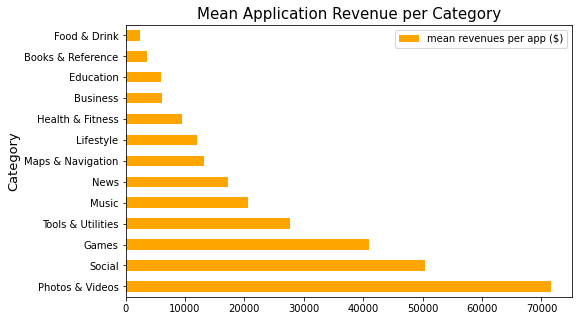

In [42]:
merged_frame.plot.barh(x='category', y='mean revenues per app ($)', color='orange', figsize = (8,5))
plt.ylabel('Category', fontsize = 13)
plt.title('Mean Application Revenue per Category', fontsize = 15)

### Results

We can clearly see from the sorted dataframe and the graph that the categories for which users are willing to pay more are:
1. Photos & Videos
1. Social
1. Games



## Question N.3
### Does users’ rating depend upon price?
<i>**(Michele Parigi)**</i>

We make a prediction: there will be higher ratings for apps that cost more because they should be at an higher quality.

First, we try to make the analysis with prices below 100$ because there are not many data over that digit.

<AxesSubplot:xlabel='price', ylabel='rating'>

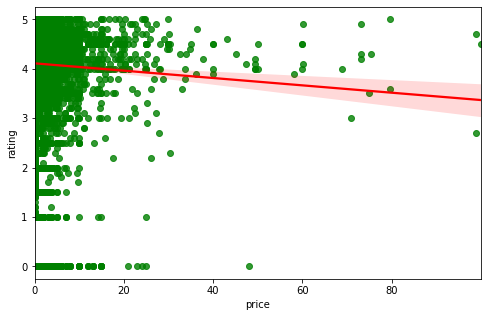

In [43]:
# we modify the dataset to have only prices below 100$
df = alldata[alldata.price < 100]

# we set the size of the graph
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
# we create the regression line through seaborn
sns.regplot(x='price', y='rating', data=df,
            fit_reg= True, color='g', dropna=True, line_kws={'color':'red'})

It seems that there is no correlation between price and users' rating. Now we try setting 60$ as limit of price to see if there are any changes.

<AxesSubplot:xlabel='price', ylabel='rating'>

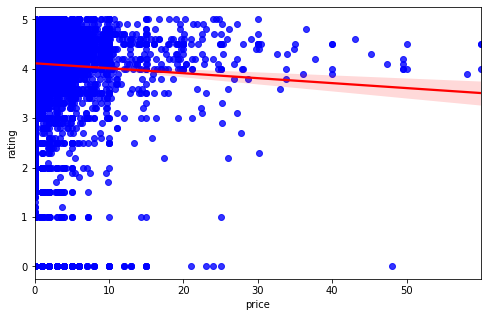

In [44]:
# we modify the dataset to have only prices below 60$
df = alldata[alldata.price < 60]

# we set the size of the graph
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# we create the regression line through seaborn
sns.regplot(x='price', y='rating', data=df,
            fit_reg= True, color='b', dropna=True, line_kws={'color':'red'})

Even with this graph, we can see that the regression line is quite flat. This means there isn't a strong correlation between users' rating and price: our prediction is wrong according to these datasets.

## Question N.4
### Do ratings, popularity and prices depend on applications' size?
<i> **(Beatrice Sibilia)** </i>

To study the relationship between two variables, or columns, I create a function that calculates the **regression line** formula.
I need to find **the equation** of the straight line in the graph created with the data I want to analyze.

Y = aX + b

* The __b__ coefficient is called the intercept and represents the value of the variable Y when X = 0.
* The value __m__ is the angular coefficient, the slope of the line, and represents the variation suffered on average by the character Y due to an increase of one unit of X.

To calculate the estimates of the parameters of the regression line:
  1. define the number of Xs present in the data;
  2. calculate the average values of X and Y;
  2. calculate the values of b and m with the following formulas:

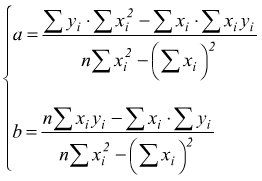

In [45]:
from IPython import display
display.Image ('http://www.edutecnica.it/calcolo/reg/8.png', width= 262, height= 181)

In [46]:
def linear_regression(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    slope_num = ((x - x_mean) * (y - y_mean)).sum()
    slope_den = ((x - x_mean)**2).sum()
    slope = slope_num / slope_den

    intercept = y_mean - (slope*x_mean)

    reg_line = 'y = {} + {}x'.format(round(intercept,3), round(slope,3))
#The format() method formats the specified value(s) and insert them inside the string's placeholder ( {} )
#The round() function returns a floating point number that is a rounded version of the specified number, with the specified number of decimals.

    return (intercept, slope, reg_line)

I create a function to find the **linear correlation coefficient** through the following formula:

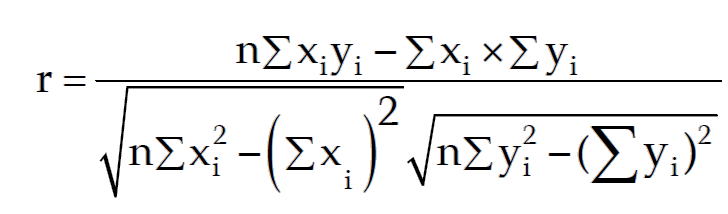

In [47]:
from IPython import display
display.Image ('https://www.onlinemath4all.com/images/pearsoncorrelation6.png', width= 349, height= 97)

* if r = ± 1 the correlation between X and Y is maximum (in the case r = + 1 there is a direct correlation, in the case r = −1 there is an inverse correlation);
* if r = 0 the correlation between the two variables is zero and therefore X and Y are said to be independent.


In [48]:
def corr_coef(x, y):
    N = len(x)

    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    r = num / den
    return r

## Relation between the size and the price of the application
To calculate the relationship between the size and the price of the applications, I assign the respective columns of the dataframe to the variables X and Y.
I apply the functions created earlier, *linear_regression* and *corr_coef*, to the variables X and Y, to obtain the *equation* of the line, the correlation coefficient *r* and the coefficient of determination, _r2_, which represents the goodness of fit of the regression model found.

In [49]:
x=alldata["size (MB)"]
y=alldata['price']

intercept, slope, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
r = corr_coef(x, y)
print('Correlation Coef.: ', round(r,3))
print('"Goodness of Fit": ', round(r**2,3))

Regression Line:  y = 0.392 + 0.003x
Correlation Coef.:  0.12
"Goodness of Fit":  0.014


I create a graph in which blue dots appear, which represent
the relationship of each element in the dataframe.
The red line represents the regression line.

<AxesSubplot:xlabel='size (MB)', ylabel='price'>

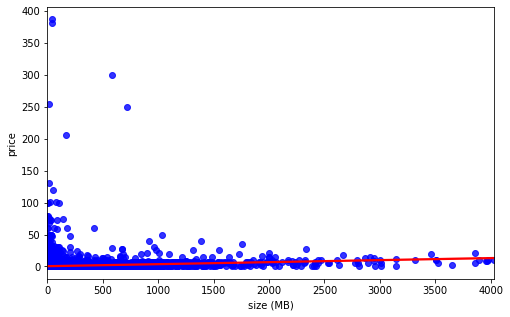

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.regplot(x=x, y=y, data= alldata,
            fit_reg= True, color='b', dropna=True, line_kws={'color':'red'})



In [51]:
data60 = alldata[alldata.price < 60]
x=data60["size (MB)"]
y=data60['price']

intercept, slope, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
r = corr_coef(x, y)
print('Correlation Coef.: ', round(r,3))
print('"Goodness of Fit": ', round(r**2,3))

Regression Line:  y = 0.354 + 0.003x
Correlation Coef.:  0.206
"Goodness of Fit":  0.043


I create another graph that shows only the values of price equal or smaller than 60, in order to better see the regression line.

<AxesSubplot:xlabel='size (MB)', ylabel='price'>

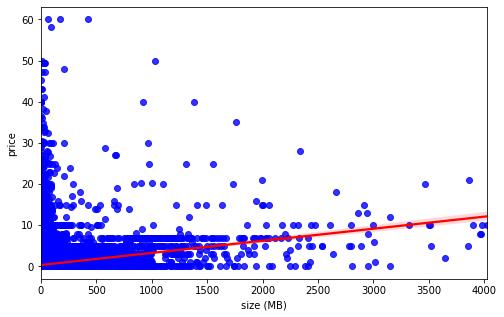

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
# we create the regression line through seaborn
sns.regplot(x=x, y=y, data= data60,
            fit_reg= True, color='b', dropna=True, line_kws={'color':'red'})

In conclusion we can say that there is not a strong correlation between the two variables, because the line has no  significant slope and because the regression coefficient has a value very close to zero. This indicates that varying the variable X, the size, does not cause a large change in the value of Y, the price.

## Relation between the size and the interactions of the application

To calculate the relationship between the size and the interaction of the applications, I assign the respective columns of the dataframe to the variables X and Y.
I apply the functions created earlier, *linear regression* and *corr coef*, to the variables X and Y, to get the *equation* of the line, the correlation coefficient *r* and the coefficient of
determination, _r2_.

In [53]:
x=alldata["size (MB)"]
y=alldata['interactions']

intercept, slope, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
r = corr_coef(x, y)
print('Correlation Coef.: ', round(r,3))
print('"Goodness of Fit": ', round(r**2,3))

Regression Line:  y = 53515.762 + -39.399x
Correlation Coef.:  -0.006
"Goodness of Fit":  0.0


I create a graph in which magenta dots appear, which represent the relationship of each element present in the dataframe. The blue line represents the regression line.

<AxesSubplot:xlabel='size (MB)', ylabel='interactions'>

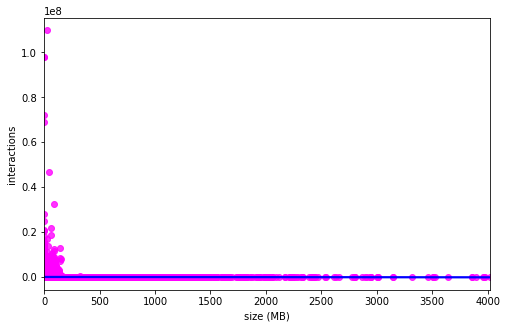

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
# we create the regression line through seaborn
sns.regplot(x=x, y=y, data= alldata,
            fit_reg= True, color='magenta', dropna=True, line_kws={'color':'blue'})

In conclusion, we can say that there is not a strong correlation between the two variables, because the line has no  significant slope and because the regression coefficient has a value very close to zero. This indicates that varying the variable X, the size, does not cause a large change in the value of Y, the interactions.

## Relation between the size and the rating of the application

To calculate the relationship between the size and the evaluation of the applications,
I assign the respective columns of the dataframe to the variables X and Y.
I apply the functions created earlier, *linear regression* and *corr coef*, to the variables X and Y,
to get the *equation* of the line, the correlation coefficient *r* and the coefficient of determination _r2_

In [55]:
x=alldata["size (MB)"]
y=alldata['rating']

intercept, slope, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
r = corr_coef(x, y)
print('Correlation Coef.: ', round(r,3))
print('"Goodness of Fit": ', round(r**2,3))

Regression Line:  y = 4.121 + -0.0x
Correlation Coef.:  0.006
"Goodness of Fit":  0.0


I create a graph in which green dots appear, representing the relationship of
each element in the dataframe. The orange line represents the regression line.

<AxesSubplot:xlabel='size (MB)', ylabel='rating'>

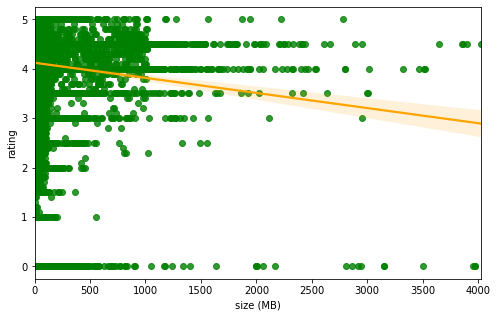

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
# we create the regression line through seaborn
sns.regplot(x=x, y=y, data= alldata,
            fit_reg= True, color='g', dropna=True, line_kws={'color':'orange'})

In conclusion we can say that there is not a strong correlation between the two variables,
because the line has no  significant slope and because the regression coefficient has a value very close to zero.
This indicates that varying the variable X, the size, does not cause a large change in the value of Y, the rating.

## Question 5
### Do most popular Apps have some characteristics in common?
<i>**(Giammarco Bozzelli</i> and <i>Marco Cavaliere)**</i>

First we need to find which are the most successful applications; to do so we sort the dataframe by the
**_'rating'_** and **_'interactions'_** columns.

In [57]:
alldata.sort_values(by = ['rating','interactions'], ascending = False, inplace = True)
alldata.head(10)

,name,price,interactions,category,store,rating,size (MB)
498,Infinity Blade,0.99,177050.0,Games,appstore,5.0,624.107810
545,"Zappos: shop shoes & clothes, fast free shipping",0.00,39452.0,Lifestyle,appstore,5.0,70.325248
3616,Browser and File Manager for Documents,0.00,27213.0,Tools & Utilities,appstore,5.0,42.198016
2989,The Room Three,4.99,21769.0,Games,appstore,5.0,1005.560832
6688,Tricky Test 2™: Genius Brain?,0.00,19952.0,Games,appstore,5.0,134.669312
16438,Bubble Match: Bubble Shooter,0.00,15473.0,Games,playstore,5.0,39.000000
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,0.00,10332.0,Games,appstore,5.0,157.851648
1104,Head Soccer,0.00,8518.0,Games,appstore,5.0,121.319424
3784,"Egg, Inc.",0.00,8442.0,Games,appstore,5.0,53.579776
4263,Super Sharp,1.99,7776.0,Games,appstore,5.0,15.110144


We now drop each row with NaN values in the
**_'size (MB)'_** column so that we will have no problem plotting the graphs and select the first 50 apps.

In [58]:
frame = alldata.drop(alldata[(alldata['size (MB)'] == 0)].index)
top_50 = frame.iloc[:50,:]
top_50.head(10)


,name,price,interactions,category,store,rating,size (MB)
6688,Tricky Test 2™: Genius Brain?,0.00,19952.0,Games,appstore,5.0,134.669312
16438,Bubble Match: Bubble Shooter,0.00,15473.0,Games,playstore,5.0,39.000000
6663,Super Cat Tales,0.00,7421.0,Games,appstore,5.0,64.337920
24536,Chinese poker - Homerun,0.00,4056.0,Games,playstore,5.0,49.000000
16532,Blackjack 21,0.00,3666.0,Games,playstore,5.0,25.000000
6761,Zip—Zap,1.99,3307.0,Games,appstore,5.0,17.095680
9640,Idle SCV - Click & Idle Tycoon,0.00,3136.0,Games,playstore,5.0,75.000000
50359,Word Connect 2020,0.00,2137.0,Games,playstore,5.0,32.000000
30610,Cats & Kitten Puzzle Games ❤️😺,0.00,2132.0,Games,playstore,5.0,44.000000
6868,Stickman Basketball 2017,0.00,1819.0,Games,appstore,5.0,203.829248


Now we create two functions in our _appstore_ module:
1. **_dictionary top_** that takes as input a _dataframe_ and a _column name_ and returns a dictionary with
each value in the column as keys, and their frequency as values
1. **_top 50 catplot_** that takes as input a dictionary and plots a Barchart representing
praphically the dictionary

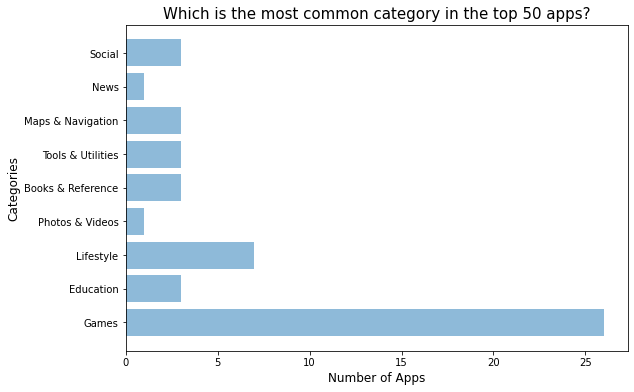

In [59]:
category_dic = app.dictionary_top(top_50,'category')
app.top_50_catplot(category_dic)

We found that the category **_'Games_** is the category with the highest number of apps in the top 50

We now add create another function called **_top 50 sizeplot_** that takes as input a DataFrame and
uses the _name_ and _size (MB)_ columns to plot a graph representing the size in MB of each application

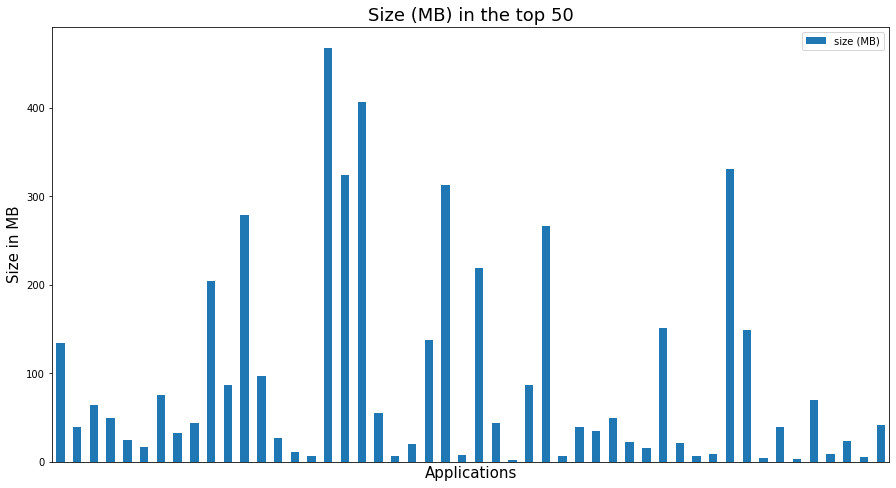

In [60]:
app.top_50_sizeplot(top_50)

looking at the graph we see that there are few applications that have a size much higher than the others, thus we decide
to remove the 7 apps with the highest size to make our representation clearer

In [61]:
top_43 = top_50.copy()
#remove the 7 applications with largest size
for i in range(7):
    top_43.drop(top_43['size (MB)'].idxmax(), inplace = True)

We now try re-plotting the graph using the _top 50 sizeplot_ function

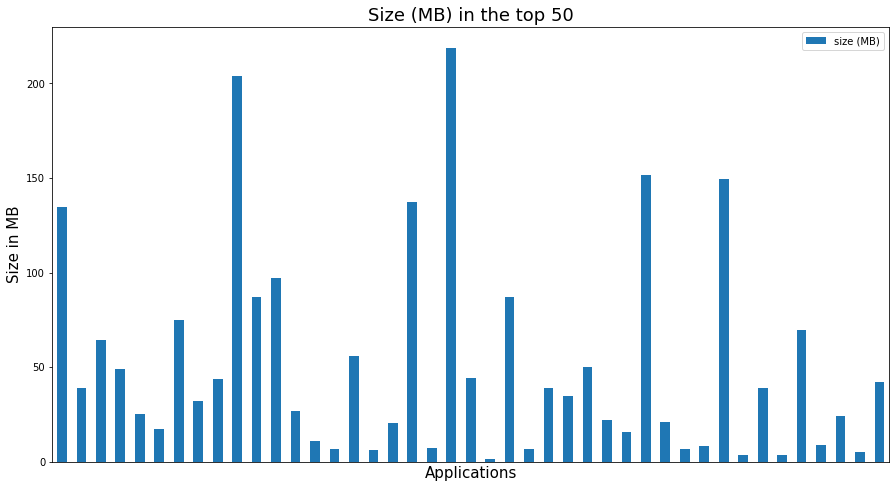

In [62]:
app.top_50_sizeplot(top_43)

The graph now is much clearer. We now find the **mean** size for the applications in the top 50

In [63]:
print('Mean =',top_43['size (MB)'].mean())
print('Standard Deviation =',top_43['size (MB)'].std())

Mean = 51.009051518804334
Standard Deviation = 54.31133787301232


It seems convenient to create applications with a size of maximum **_105 MB_**

We move on analyzing if most popular apps have the same pricing. To do this we firstly create another dataframe with
only the top 50 apps, and we find the frequency for each price using the _dictionary top_ funciton we created

In [64]:
price_top = frame.iloc[:50,:]
price_dic = app.dictionary_top(price_top,'price')

We now plot the results using a new function called **_top 50 priceplot_** that takes as input a frequency dictionary and returns
a graphical representation of it.

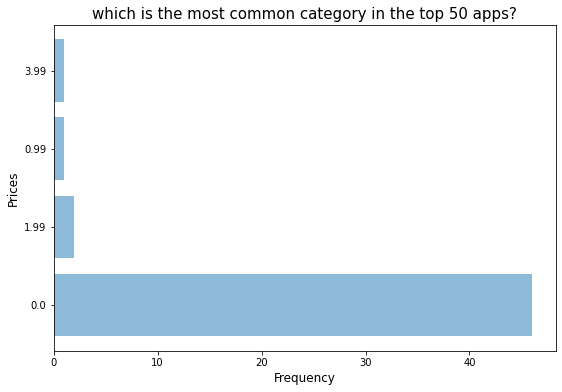

In [65]:
app.top_50_priceplot(price_dic)

We have found that the most frequent **price** for applications in the top 50 is **0**

#### But what if a company wants to develope a **non free** application?
We can study the best price strategy by **removing** from a new dataframe all applications with **price = 0**

In [66]:
price_top = frame.iloc[:50,:]
price_top = price_top.drop(price_top[(price_top['price'] == 0.0)].index)
price_dic = app.dictionary_top(price_top,'price')


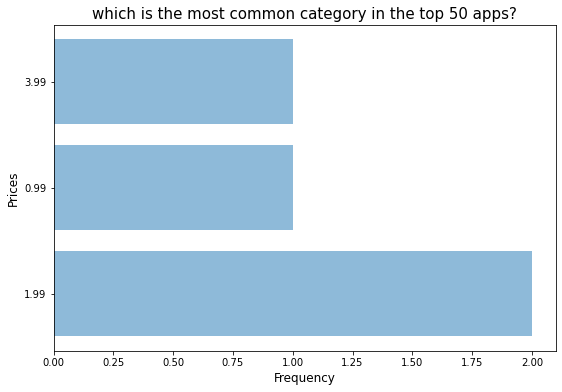

In [67]:
app.top_50_priceplot(price_dic)

**1.99$** appears to be the best option for making a premium application.

Then we go ahead and try to find out if one appstore is a safer bet to make applications that will end up in the
top 50. To do this we create a new dataframe and apply the _dictionary top_ function with respect to the **_'store'_**
column.

In [68]:
store_top = frame.iloc[:50,:]
store_dic = app.dictionary_top(store_top,'store')

To represent the results this time we decite to plot a **pie chart**

([<matplotlib.patches.Wedge at 0x24227704d30>,
 [Text(0.27355891977302554, 1.065441465972024, 'appstore'),
  Text(-0.2735590195268539, -1.0654414403595847, 'playstore')])

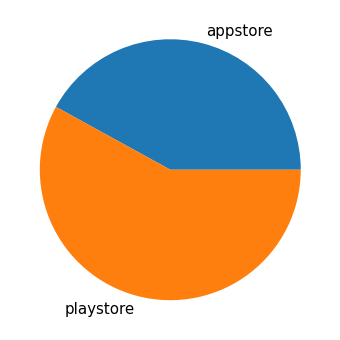

In [69]:
plt.figure(figsize = (6,6))
plt.pie(list(store_dic.values()),labels = list(store_dic.keys()), textprops={'fontsize': 15})

**_Playstore_** has the highest number of applications among top apps

Let's now **use all our findings together** and see if there are any applications with all of them

In [70]:
top_50 = top_50[top_50['category'] == 'Games']
top_50 = top_50.loc[(top_50['size (MB)'] <= 105.320389392)]
top_50 = top_50.loc[top_50['price'] == 0]
top_50 = top_50.loc[top_50['store'] == 'playstore']
top_50

,name,price,interactions,category,store,rating,size (MB)
16438,Bubble Match: Bubble Shooter,0.0,15473.0,Games,playstore,5.0,39.0
24536,Chinese poker - Homerun,0.0,4056.0,Games,playstore,5.0,49.0
16532,Blackjack 21,0.0,3666.0,Games,playstore,5.0,25.0
9640,Idle SCV - Click & Idle Tycoon,0.0,3136.0,Games,playstore,5.0,75.0
50359,Word Connect 2020,0.0,2137.0,Games,playstore,5.0,32.0
30610,Cats & Kitten Puzzle Games ❤️😺,0.0,2132.0,Games,playstore,5.0,44.0
19201,Mini Tank: Fire,0.0,1442.0,Games,playstore,5.0,87.0
38702,Traffic Car Shooting Games - FPS Shooting Games,0.0,448.0,Games,playstore,5.0,50.0
51041,Box Against,0.0,410.0,Games,playstore,5.0,22.0


### Problem?
Observing this table we see that interactions are not that high...
We know try to sort apps by the **_'interactions'_** column first

In [71]:
alldata.sort_values(by = ['interactions','rating'], ascending = False, inplace = True)
a = alldata.drop(alldata[(alldata['size (MB)'] == 0)].index)#to select the first 50 popular apps
top_interactions = a.iloc[:50,:]
top_interactions.head(10)

,name,price,interactions,category,store,rating,size (MB)
7701,Snapchat,0.0,21879310.0,Social,playstore,4.4,60.0
14924,"Safe Security - Antivirus, Booster, Phone Cleaner",0.0,16824576.0,Tools & Utilities,playstore,4.6,26.0
7693,Wish - Shopping Made Fun,0.0,9535250.0,Lifestyle,playstore,4.4,23.0
20090,Gardenscapes,0.0,8309870.0,Games,playstore,4.3,148.0
20085,Homescapes,0.0,7915716.0,Games,playstore,4.4,155.0
28000,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",0.0,7746534.0,Maps & Navigation,playstore,4.4,87.0
33230,GO Launcher - 3D parallax Themes & HD Wallpapers,0.0,7551257.0,Lifestyle,playstore,4.5,50.0
20091,Township,0.0,7147787.0,Games,playstore,4.5,142.0
5393,AVG AntiVirus 2020 for Android Security Free,0.0,6817869.0,Tools & Utilities,playstore,4.7,14.0
5364,Avast Antivirus – Mobile Security & Virus Cleaner,0.0,6061767.0,Tools & Utilities,playstore,4.7,14.0


As we can see now the top applications are pretty different.
We choose to do all the analyses we did before with this new dataset and see what are the final results.

#### What is the most common 'category' now?

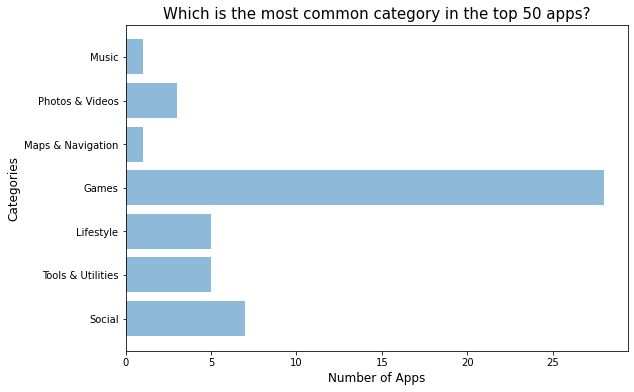

In [72]:
category_dic = app.dictionary_top(top_interactions,'category')
app.top_50_catplot(category_dic)

**_'Games'_** still is the most frequent category between apps in the top 50

Moving on we plot the size for each application using the _top 50 sizeplot_ function.

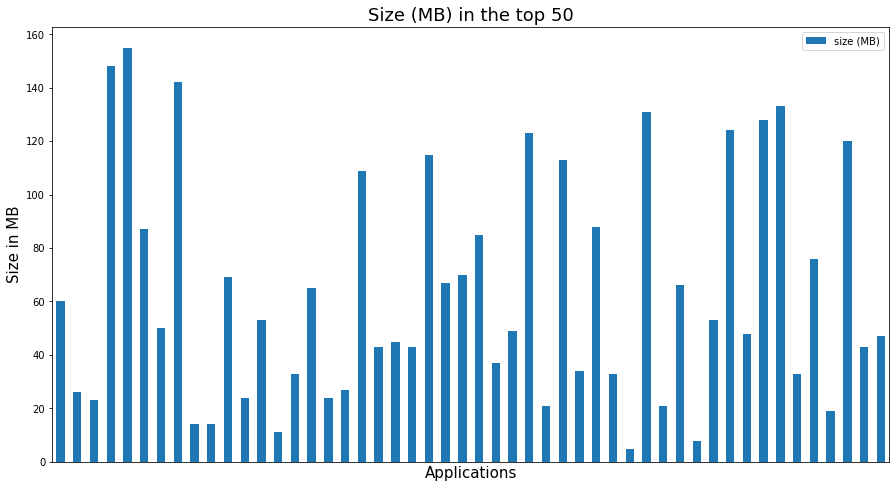

In [73]:
app.top_50_sizeplot(top_interactions)

In [74]:
print('Mean =',top_interactions['size (MB)'].mean())
print('Standard Deviation =',top_interactions['size (MB)'].std())

Mean = 63.09199999809265
Standard Deviation = 42.62874301239671


This time the graph is clear even without removing any app, one thing in common with the previous
 graph is that applciations should have a **size < 105**

In [75]:
price_top = a.iloc[:50,:]
price_dic = app.dictionary_top(price_top,'price')
price_dic

{0.0: 50}

As we can see now there is only one price for the apps in the top 50.

#### To which platfrom do most apps belong to?

In [76]:
store_top = a.iloc[:50,:]
store_dic = app.dictionary_top(store_top,'store')
store_dic

{'playstore': 50}

This time all Applications also come from the same store: **Playstore**

Let's now put all our new findings together and see what applications have them all:

In [77]:
#let's now put together all the most common characteristics to find apps that them them all
top_interactions = top_interactions[top_interactions['category'] == 'Games']
top_interactions = top_interactions.loc[(top_interactions['size (MB)'] >= 20.463256986) & (top_interactions['size (MB)'] <= 105.72074301)]
top_interactions

,name,price,interactions,category,store,rating,size (MB)
5922,Traffic Racer,0.0,5787718.0,Games,playstore,4.6,53.0
13121,The Sims FreePlay,0.0,5315947.0,Games,playstore,3.9,33.0
30359,Angry Birds 2,0.0,5165743.0,Games,playstore,4.5,65.0
21792,Ludo King™,0.0,4439512.0,Games,playstore,4.3,43.0
25448,Helix Jump,0.0,4202033.0,Games,playstore,4.0,43.0
20615,The Simpsons™: Tapped Out,0.0,4009802.0,Games,playstore,4.2,67.0
8381,CSR Racing 2 - #1 in Car Racing Games,0.0,3995777.0,Games,playstore,4.6,70.0
5989,DEER HUNTER CLASSIC,0.0,3977103.0,Games,playstore,4.4,85.0
6416,My Cafe — Restaurant game,0.0,3703585.0,Games,playstore,4.6,34.0
9765,Pet Rescue Saga,0.0,3408639.0,Games,playstore,4.6,88.0


### Results
We saw that depending on how we order the dataframe results change.
This said, looking at the results the latter method we used seems more correct,
thus we can say that applications in the top 50 have these characteristics in common:
- *Category* = **Games**
- *Size* <= **150 MB**
- *Price* = **Free**
- *Store* = **Playstore**